Import of libraries and dataset.

In [390]:
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from functions import *

In [391]:
df = pd.read_csv('churn.csv')

# Data exploration and cleaning
Glancing through dataset. Change settings of pandas to allow it to show all columns. Use horizontal scroll to view them all.

In [392]:
pd.options.display.max_columns = None
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Removed area code and phone number for privacy and for adding no extra value to dataset.

In [394]:
df.drop(['area code','phone number'],1,inplace=True)

Replaced "yes" to 1 and "no" to 0, so the dataset is able to be examined through algorithms. Kept churn column as True and False because python is able to work with booleans.

In [395]:
df = df.applymap(lambda x: 1 if x == 'yes' else(0 if x == 'no' else x))
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Pivot table that has mean as values.

In [396]:
pivot = df.pivot_table(columns='churn',aggfunc=np.mean)
pivot

churn,False,True
account length,100.793684,102.664596
customer service calls,1.449825,2.229814
international plan,0.065263,0.283644
number vmail messages,8.604561,5.115942
total day calls,100.283158,101.335404
total day charge,29.780421,35.175921
total day minutes,175.175754,206.914079
total eve calls,100.038596,100.561077
total eve charge,16.918909,18.054969
total eve minutes,199.043298,212.410145


Visualization that shows pivot table. 

In [397]:
dfTrue = df.loc[df['churn']==True].drop(['churn','state'],1)
dfFalse = df.loc[df['churn']!=True].drop(['churn','state'],1)

In [398]:
dfTrue.columns[0]

'account length'

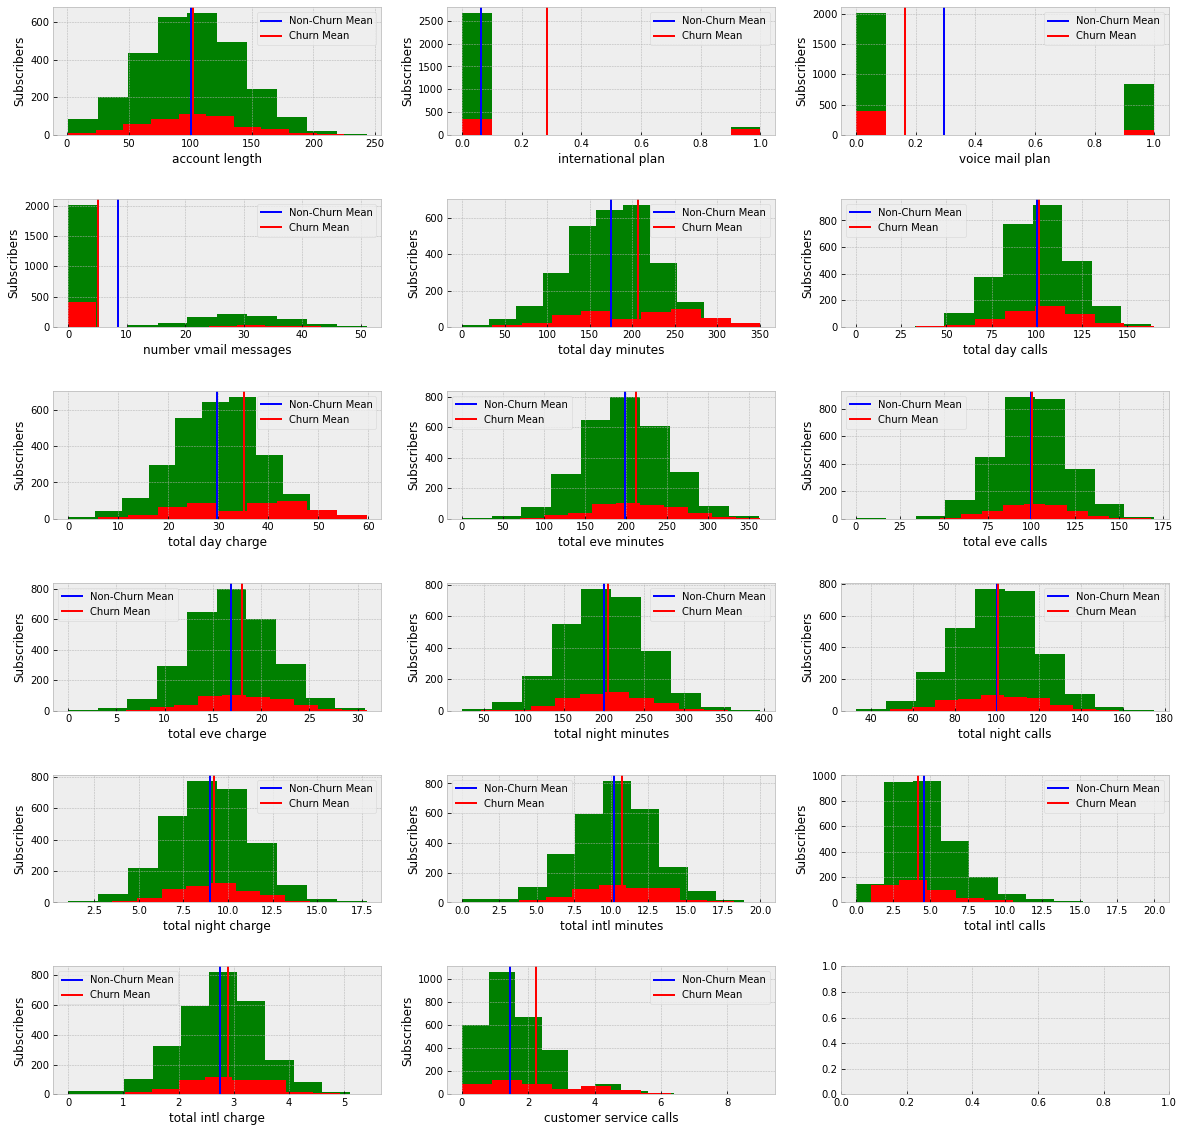

In [441]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(nrows=6, ncols=3,figsize=(20,20))
    fig.subplots_adjust(hspace=.5)
    i = 0
    for row in ax:
        for col in row:
            column = dfFalse.columns[i]
            col.hist(dfFalse[column],color='green')
            col.hist(dfTrue[column],color='red')
            col.axvline(np.mean(dfFalse[column]),label='Non-Churn Mean',color='blue')
            col.axvline(np.mean(dfTrue[column]),label='Churn Mean',color='red')
            col.set_xlabel(column)
            col.set_ylabel('Subscribers')
            col.legend()
            i+=1
            if i == 17:
                break
        if i == 17:
            break

Visualization showing states with the greatest churn to least. 

In [400]:
statesTrue = df.loc[df.churn == True]['state']
states = {}
for i in statesTrue:
    if i in states:
        value = states.get(i)
        value += 1
        states.update({i:value})
    else:
        states.update({i:1})

In [401]:
sortedStates = {k: v for k, v in sorted(states.items(), key=lambda item: item[1],reverse=True)}

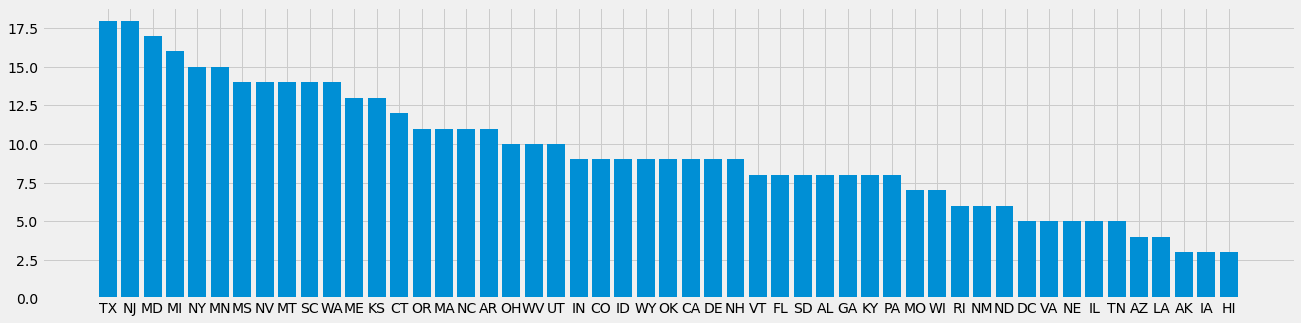

In [402]:
with plt.style.context('fivethirtyeight'): 
    plt.figure(figsize=(20,5))
    plt.bar(sortedStates.keys(),sortedStates.values())

Visualization of how much churn customers vs non-churn customers pay vs how many minutes they consume.

In [403]:
billingUsage = df[['total day minutes','total eve minutes','total night minutes',
                   'total day charge','total eve charge','total night charge','churn']]

billingUsageTrue = billingUsage.loc[billingUsage['churn']==True].drop(['churn'],1)
billingUsageFalse = billingUsage.loc[billingUsage['churn']!=True].drop(['churn'],1)

TrueX= billingUsageTrue.iloc[:,0]+billingUsageTrue.iloc[:,1]+billingUsageTrue.iloc[:,2]
TrueY= billingUsageTrue.iloc[:,3]+billingUsageTrue.iloc[:,4]+billingUsageTrue.iloc[:,5]

FalseX = billingUsageFalse.iloc[:,0]+billingUsageFalse.iloc[:,1]+billingUsageFalse.iloc[:,2]
FalseY = billingUsageFalse.iloc[:,3]+billingUsageFalse.iloc[:,4]+billingUsageFalse.iloc[:,5]

Customers with churn pay around: 0.1 per minute
Customers with non-churn pay around: 0.097 per minute


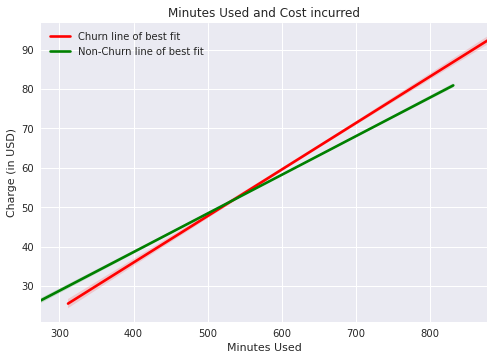

In [404]:
with plt.style.context('seaborn'): 
    sn.regplot(TrueX,TrueY,scatter=False,color='red',label='Churn line of best fit')
    sn.regplot(FalseX,FalseY,scatter=False,color='green',label='Non-Churn line of best fit')
    plt.legend()
    plt.xlabel('Minutes Used')
    plt.ylabel('Charge (in USD)')
    plt.title('Minutes Used and Cost incurred')

print('Customers with churn pay around:',round(sum(TrueY)/sum(TrueX),2),'per minute')
print('Customers with non-churn pay around:',round(sum(FalseY)/sum(FalseX),3),'per minute')

# Analysis
Importing models for classification and metrics from the sklearn library.

In [405]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler as scale
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier as xgbc

Turning the states column into dummy variables.

In [406]:
dummyState = pd.get_dummies(df.state,drop_first=True)
dfNoStates = df.drop('state',1)
features = dfNoStates.join(dummyState)

Splitting data into train and test set. Scaling training and test set separetaly to avoid data leakage.

In [407]:
y = features.churn
X = features.drop('churn',1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=43)
X_train = scale().fit_transform(X_train)
X_test = scale().fit_transform(X_test)

Dictionary containing different models for classification.

In [408]:
algos = {'Logistic Regression':LogisticRegression(),'K-Neighbors':KNeighborsClassifier(),'Naive Bayes':GaussianNB(),
        'Decision Tree':DecisionTreeClassifier(),'Random Forest':RandomForestClassifier(),'AdaBoost':AdaBoostClassifier(),
        'Gradient Boost':GradientBoostingClassifier(),'XGBoost Classifier':xgbc(),'SVC':SVC()}

Custom function that returns a data frame with the results for accuracy and F1 test.

In [409]:
modelDF = ModelCompare(algos,X_train,y_train,X_test,y_test)
modelDF

,Models,Training Accuracy,Test Accuracy,F1 Train,F1 Test
0,Logistic Regression,0.861945,0.852518,0.327485,0.388060
1,K-Neighbors,0.872749,0.880096,0.317597,0.206349
2,Naive Bayes,0.607843,0.541966,0.354414,0.242063
3,Decision Tree,1.000000,0.805755,1.000000,0.484076
4,Random Forest,1.000000,0.910072,1.000000,0.672489
5,AdaBoost,0.890356,0.840528,0.560897,0.526690
6,Gradient Boost,0.972389,0.895683,0.900719,0.653386
7,XGBoost Classifier,1.000000,0.888489,1.000000,0.640927
8,SVC,0.867547,0.899281,0.228438,0.373134


In [410]:
modelDF.loc[(modelDF['F1 Train'] > .50)&(modelDF['F1 Test'] > .50)].sort_values(['F1 Test'],ascending=False)

,Models,Training Accuracy,Test Accuracy,F1 Train,F1 Test
4,Random Forest,1.000000,0.910072,1.000000,0.672489
6,Gradient Boost,0.972389,0.895683,0.900719,0.653386
7,XGBoost Classifier,1.000000,0.888489,1.000000,0.640927
5,AdaBoost,0.890356,0.840528,0.560897,0.526690


### Random Forest
Due to its performance in the F1 test set, picked random forest to explore further.

In [411]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV as grid
from sklearn.metrics import make_scorer
forest = RandomForestClassifier()

Used synthetic sampling due to imbalances.

In [412]:
X_resample, y_resample = SMOTE().fit_resample(X_train,y_train)

Used gridsearch to try multiple parameters. Grid search will use all available threads to run. This was run on google colab for a couple hours to get results.

In [413]:
'''
Input:

f1_scorer = make_scorer(f1_score)
params = {'n_estimators':[90,95,100,105,110],'criterion':['gini','entropy'],
          'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5],'min_weight_fraction_leaf':[0,.1,.2,.3,.4,.5],
         'max_features':['auto', 'sqrt', 'log2'],'bootstrap':[True,False]}
grid = grid(forest,params,scoring=f1_scorer,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_


Output:

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 95}
'''

"\nInput:\n\nf1_scorer = make_scorer(f1_score)\nparams = {'n_estimators':[90,95,100,105,110],'criterion':['gini','entropy'],\n          'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5],'min_weight_fraction_leaf':[0,.1,.2,.3,.4,.5],\n         'max_features':['auto', 'sqrt', 'log2'],'bootstrap':[True,False]}\ngrid = grid(forest,params,scoring=f1_scorer,n_jobs=-1)\ngrid.fit(X_train,y_train)\ngrid.best_params_\n\n\nOutput:\n\n{'bootstrap': False,\n 'criterion': 'gini',\n 'max_features': 'auto',\n 'min_samples_leaf': 1,\n 'min_samples_split': 5,\n 'min_weight_fraction_leaf': 0,\n 'n_estimators': 95}\n"

Ran 4 models:  
Tuned random forest model  
Synthetic sample model  
Tuned with synthetic sample model  
Vanilla random forest model  

Benchmark each model in F1, accuracy, precision, and recall.

In [414]:
forestTuned = RandomForestClassifier(n_estimators=95,min_samples_split=5,bootstrap=False).fit(X_train,y_train)
predTuned = forestTuned.predict(X_test)

tunedMetrics = Benchmarks(y_test,predTuned,[f1_score,accuracy_score,precision_score,recall_score])

In [415]:
forest.fit(X_resample,y_resample)
predSMOTE = forest.predict(X_test)

SMOTEMetrics = Benchmarks(y_test,predSMOTE,[f1_score,accuracy_score,precision_score,recall_score])

In [416]:
forestTuned.fit(X_resample,y_resample)
predTunedSMOTE = forestTuned.predict(X_test)

tunedSMOTEMetrics = Benchmarks(y_test,predTunedSMOTE,[f1_score,accuracy_score,precision_score,recall_score])

In [417]:
forest.fit(X_train,y_train)
predForest = forest.predict(X_test)

forestMetrics = Benchmarks(y_test,predForest,[f1_score,accuracy_score,precision_score,recall_score])

In [418]:
algoMetrics = {'Random Forest':forestMetrics,'Tuned':tunedMetrics,'SMOTE':SMOTEMetrics,'Tuned SMOTE':tunedSMOTEMetrics}

Visualization of all 4 models in all 4 metrics.

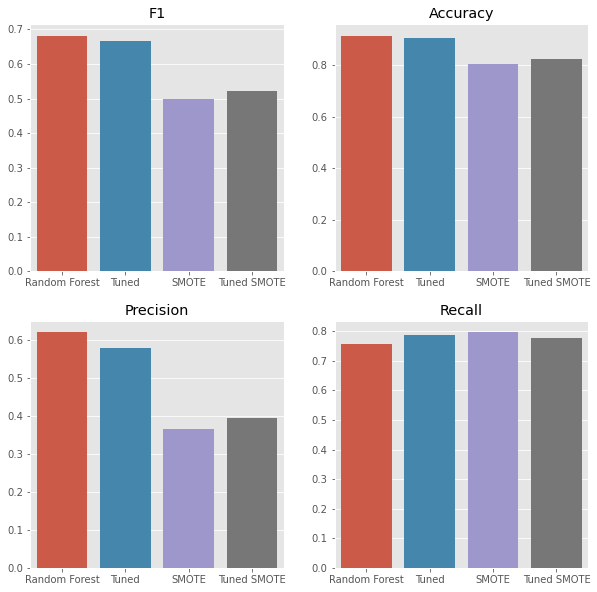

In [419]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
    i = 0
    for row in ax:
        for col in row:
            metricsName = ['F1','Accuracy','Precision','Recall']
            metricData = []
            algoName = []
            
            for key in algoMetrics.keys():
                algoName.append(key)
                lst = algoMetrics.get(key)
                metricData.append(lst[i])
                
            sn.barplot(algoName,metricData,ax=col)
            col.set_title(metricsName[i])
            i+=1

Extracted top 5 important features and visualized them.

In [420]:
featuresMetrics = {}
for i in range(len(X.columns)):
    featuresMetrics.update({X.columns[i]:forest.feature_importances_[i]})

sortedFeaturesMetrics = {k: v for k, v in sorted(featuresMetrics.items(), key=lambda item: item[1],reverse=True)}

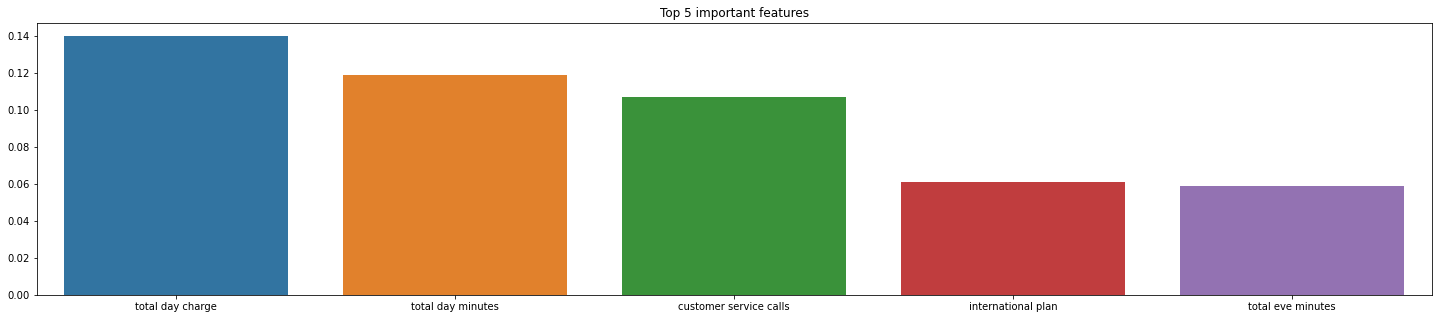

In [421]:
with plt.style.context('fast'):
    plt.figure(figsize=(25,5))
    sn.barplot(list(sortedFeaturesMetrics)[0:5],list(sortedFeaturesMetrics.values())[0:5])
    plt.title('Top 5 important features')

# Analysis #2  
Removed states from features due to low score on feature relevance from random forest analysis.

In [422]:
X_noStates = dfNoStates.drop('churn',1)
y_noStates = dfNoStates['churn']

In [423]:
X_trainNS, X_testNS, y_trainNS, y_testNS = train_test_split(X_noStates,y_noStates,random_state=43)
X_trainNS = scale().fit_transform(X_trainNS)
X_testNS = scale().fit_transform(X_testNS)

Benchmark all classification algorithms without states in their features.

In [424]:
modelDfNS = ModelCompare(algos,X_trainNS,y_trainNS,X_testNS,y_testNS)
modelDfNS

,Models,Training Accuracy,Test Accuracy,F1 Train,F1 Test
0,Logistic Regression,0.860344,0.859712,0.294949,0.400000
1,K-Neighbors,0.919568,0.911271,0.661046,0.618557
2,Naive Bayes,0.863145,0.851319,0.548813,0.566434
3,Decision Tree,1.000000,0.820144,1.000000,0.509804
4,Random Forest,0.999600,0.896882,0.998682,0.647541
5,AdaBoost,0.893157,0.859712,0.574163,0.506329
6,Gradient Boost,0.971589,0.896882,0.898135,0.661417
7,XGBoost Classifier,1.000000,0.895683,1.000000,0.656126
8,SVC,0.916767,0.920863,0.636364,0.688679


In [425]:
modelDfNS.loc[(modelDfNS['F1 Train'] > .50)&(modelDfNS['F1 Test'] > .50)].sort_values(['F1 Test'],ascending=False)

,Models,Training Accuracy,Test Accuracy,F1 Train,F1 Test
8,SVC,0.916767,0.920863,0.636364,0.688679
6,Gradient Boost,0.971589,0.896882,0.898135,0.661417
7,XGBoost Classifier,1.000000,0.895683,1.000000,0.656126
4,Random Forest,0.999600,0.896882,0.998682,0.647541
1,K-Neighbors,0.919568,0.911271,0.661046,0.618557
2,Naive Bayes,0.863145,0.851319,0.548813,0.566434
3,Decision Tree,1.000000,0.820144,1.000000,0.509804
5,AdaBoost,0.893157,0.859712,0.574163,0.506329


## SVC
Due to its performance in F1 test set, picked SVC to explore further.

In [426]:
#Synthetic resampling due to sample imbalance.
X_resampleNS, y_resampleNS = SMOTE().fit_resample(X_trainNS,y_trainNS)

Used gridsearch to try multiple parameters. Grid search will use all available threads to run. This was run on google colab for a couple hours to get results.

In [439]:
"""
input:
f1_scorer = make_scorer(f1_score)
params = {'C':[1,2,3],'kernel':['linear','poly','rbf','sigmoid','precomputer'],'degree':[1,2,3,4,5],'gamma':['scale','auto'],
         'shrinking':[True,False],'decision_function_shape':['ovo','ovr']}
grid = grid(forest,params,scoring=f1_scorer,n_jobs=-1)
grid.fit(X_trainNS,y_trainNS)
grid.best_params_

output:
{C:3,
decision_function_shape:'ovo',
degree:1
gamma:'scale',
kernel:'rbf',
shrinking: True}
"""

"\ninput:\nf1_scorer = make_scorer(f1_score)\nparams = {'C':[1,2,3],'kernel':['linear','poly','rbf','sigmoid','precomputer'],'degree':[1,2,3,4,5],'gamma':['scale','auto'],\n         'shrinking':[True,False],'decision_function_shape':['ovo','ovr']}\ngrid = grid(forest,params,scoring=f1_scorer,n_jobs=-1)\ngrid.fit(X_trainNS,y_trainNS)\ngrid.best_params_\n\noutput:\n{C:3,\ndecision_function_shape:'ovo',\ndegree:1\ngamma:'scale',\nkernel:'rbf',\nshrinking: True}\n"

Ran 4 models:  
Tuned SVC model  
Synthetic sample model  
Tuned with synthetic sample model  
Vanilla SVC model  

Benchmark each model in F1, accuracy, precision, and recall.

In [428]:
tunedSVC = SVC(C=5,degree=1,decision_function_shape='ovo').fit(X_trainNS,y_trainNS)
tunedPred = tunedSVC.predict(X_testNS)

tunedSVCmetric = Benchmarks(y_testNS,tunedPred,[f1_score,accuracy_score,precision_score,recall_score])

In [429]:
SMOTEsvc = SVC().fit(X_resampleNS,y_resampleNS)
SMOTEsvcPred= SMOTEsvc.predict(X_testNS)

SMOTEsvcMetric = Benchmarks(y_testNS,SMOTEsvcPred,[f1_score,accuracy_score,precision_score,recall_score])

In [430]:
tunedSMOTEsvc=SVC(C=5,degree=1,decision_function_shape='ovo').fit(X_resampleNS,y_resampleNS)
tunedSMOTEsvcPred = tunedSMOTEsvc.predict(X_testNS)

tunedSMOTEsvcMetric = Benchmarks(y_testNS,tunedSMOTEsvcPred,[f1_score,accuracy_score,precision_score,recall_score])

In [431]:
SVC = SVC().fit(X_trainNS,y_trainNS)
SVCpred = SVC.predict(X_testNS)

SVCmetric = Benchmarks(y_testNS,SVCpred,[f1_score,accuracy_score,precision_score,recall_score])

In [432]:
algoMetricsSVC = {'SVC':SVCmetric,'Tuned':tunedSVCmetric,'SMOTE':SMOTEsvcMetric,'Tuned SMOTE':tunedSMOTEsvcMetric}

Visualization of all 4 models in all 4 metrics.

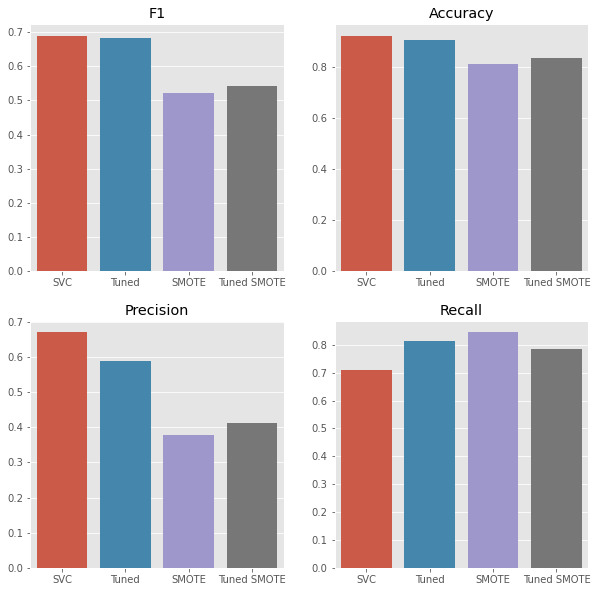

In [438]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
    i = 0
    for row in ax:
        for col in row:
            metricsName = ['F1','Accuracy','Precision','Recall']
            metricData = []
            algoName = []

            for key in algoMetricsSVC.keys():
                algoName.append(key)
                lst = algoMetricsSVC.get(key)
                metricData.append(lst[i])

            sn.barplot(algoName,metricData,ax=col)
            col.set_title(metricsName[i])
            i+=1